In [0]:
import numpy as np
import pandas as pd# Data and Numbers
import pandas as pd
import numpy as np
import datetime as dt
import statsmodels.api as sm

# Modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import precision_score, recall_score,\
precision_recall_curve,f1_score, fbeta_score,\
accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import svm
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.externals.six import StringIO
from xgboost import XGBClassifier

# Saving
import joblib
import pickle

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz
%matplotlib inline
from matplotlib import rcParams

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

## **Import Datasets**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv("/content/drive/My Drive/MLSpring2020/AIInsight_CrunchbasePrediction/Datasets/crunchbase/df_clean.csv",encoding= 'unicode_escape', index_col=False)

In [0]:
df.head(2)

,Unnamed: 0,target,IPqwery-PatentsGranted,BuiltWith-ActiveTechCount,NumberofFounders,NumberofFundingRounds,NumberofInvestors,NumberofLeadInvestors,inv_by_famous_investor,FoundedYear,EstimatedRevenueRange_$10M+,EstimatedRevenueRange_$1M to $10M,EstimatedRevenueRange_Less than $1M,EstimatedRevenueRange_unknown,FundingStatus_Early Stage Venture,FundingStatus_Late Stage Venture,FundingStatus_Seed,HeadquartersLocation_new_North_East_Bay,HeadquartersLocation_new_Sf_around,HeadquartersLocation_new_South_Bay,HeadquartersLocation_new_others
0,0,0,0.0,11.0,2.0,1,2.0,0.0,0,2014,0,0,0,1,0,0,1,1,0,0,0
1,1,1,0.0,23.0,2.0,2,5.0,2.0,0,2014,0,0,1,0,1,0,0,0,0,1,0


In [0]:
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [0]:
df.head()

,target,IPqwery-PatentsGranted,BuiltWith-ActiveTechCount,NumberofFounders,NumberofFundingRounds,NumberofInvestors,NumberofLeadInvestors,inv_by_famous_investor,FoundedYear,EstimatedRevenueRange_$10M+,EstimatedRevenueRange_$1M to $10M,EstimatedRevenueRange_Less than $1M,EstimatedRevenueRange_unknown,FundingStatus_Early Stage Venture,FundingStatus_Late Stage Venture,FundingStatus_Seed,HeadquartersLocation_new_North_East_Bay,HeadquartersLocation_new_Sf_around,HeadquartersLocation_new_South_Bay,HeadquartersLocation_new_others
0,0,0.0,11.0,2.0,1,2.0,0.0,0,2014,0,0,0,1,0,0,1,1,0,0,0
1,1,0.0,23.0,2.0,2,5.0,2.0,0,2014,0,0,1,0,1,0,0,0,0,1,0
2,1,0.0,13.0,2.0,6,8.0,2.0,0,2009,1,0,0,0,0,1,0,0,1,0,0
3,0,5.0,14.0,2.0,1,0.0,0.0,0,2013,0,0,0,1,0,0,1,0,0,0,1
4,1,0.0,31.0,1.0,4,6.0,3.0,0,2010,0,1,0,0,0,1,0,0,0,0,1


In [0]:
df.shape

(8212, 20)

#Feature Selector

In [0]:
from feature_selector import FeatureSelector

In [0]:
# separating inputs and label
X = df.iloc[:, 1:19] 
y = df['target'] #last column

In [0]:
fs = FeatureSelector(data = X, labels = y)

**Found zero features with correlation magnitude > 0.98**

In [0]:
fs.identify_collinear(correlation_threshold=0.985)

0 features with a correlation magnitude greater than 0.98.



In [0]:
fs.identify_collinear(correlation_threshold=0.85)

0 features with a correlation magnitude greater than 0.85.



In [0]:
fs.identify_collinear(correlation_threshold=0.785)

1 features with a correlation magnitude greater than 0.79.



In [0]:
fs.identify_collinear(correlation_threshold=0.685)

1 features with a correlation magnitude greater than 0.69.



In [0]:
fs.identify_collinear(correlation_threshold=0.585)

5 features with a correlation magnitude greater than 0.58.



In [0]:
correlated_features = fs.ops['collinear']
correlated_features[:7]

['NumberofInvestors',
 'NumberofLeadInvestors',
 'EstimatedRevenueRange_unknown',
 'FundingStatus_Seed',
 'HeadquartersLocation_new_South_Bay']

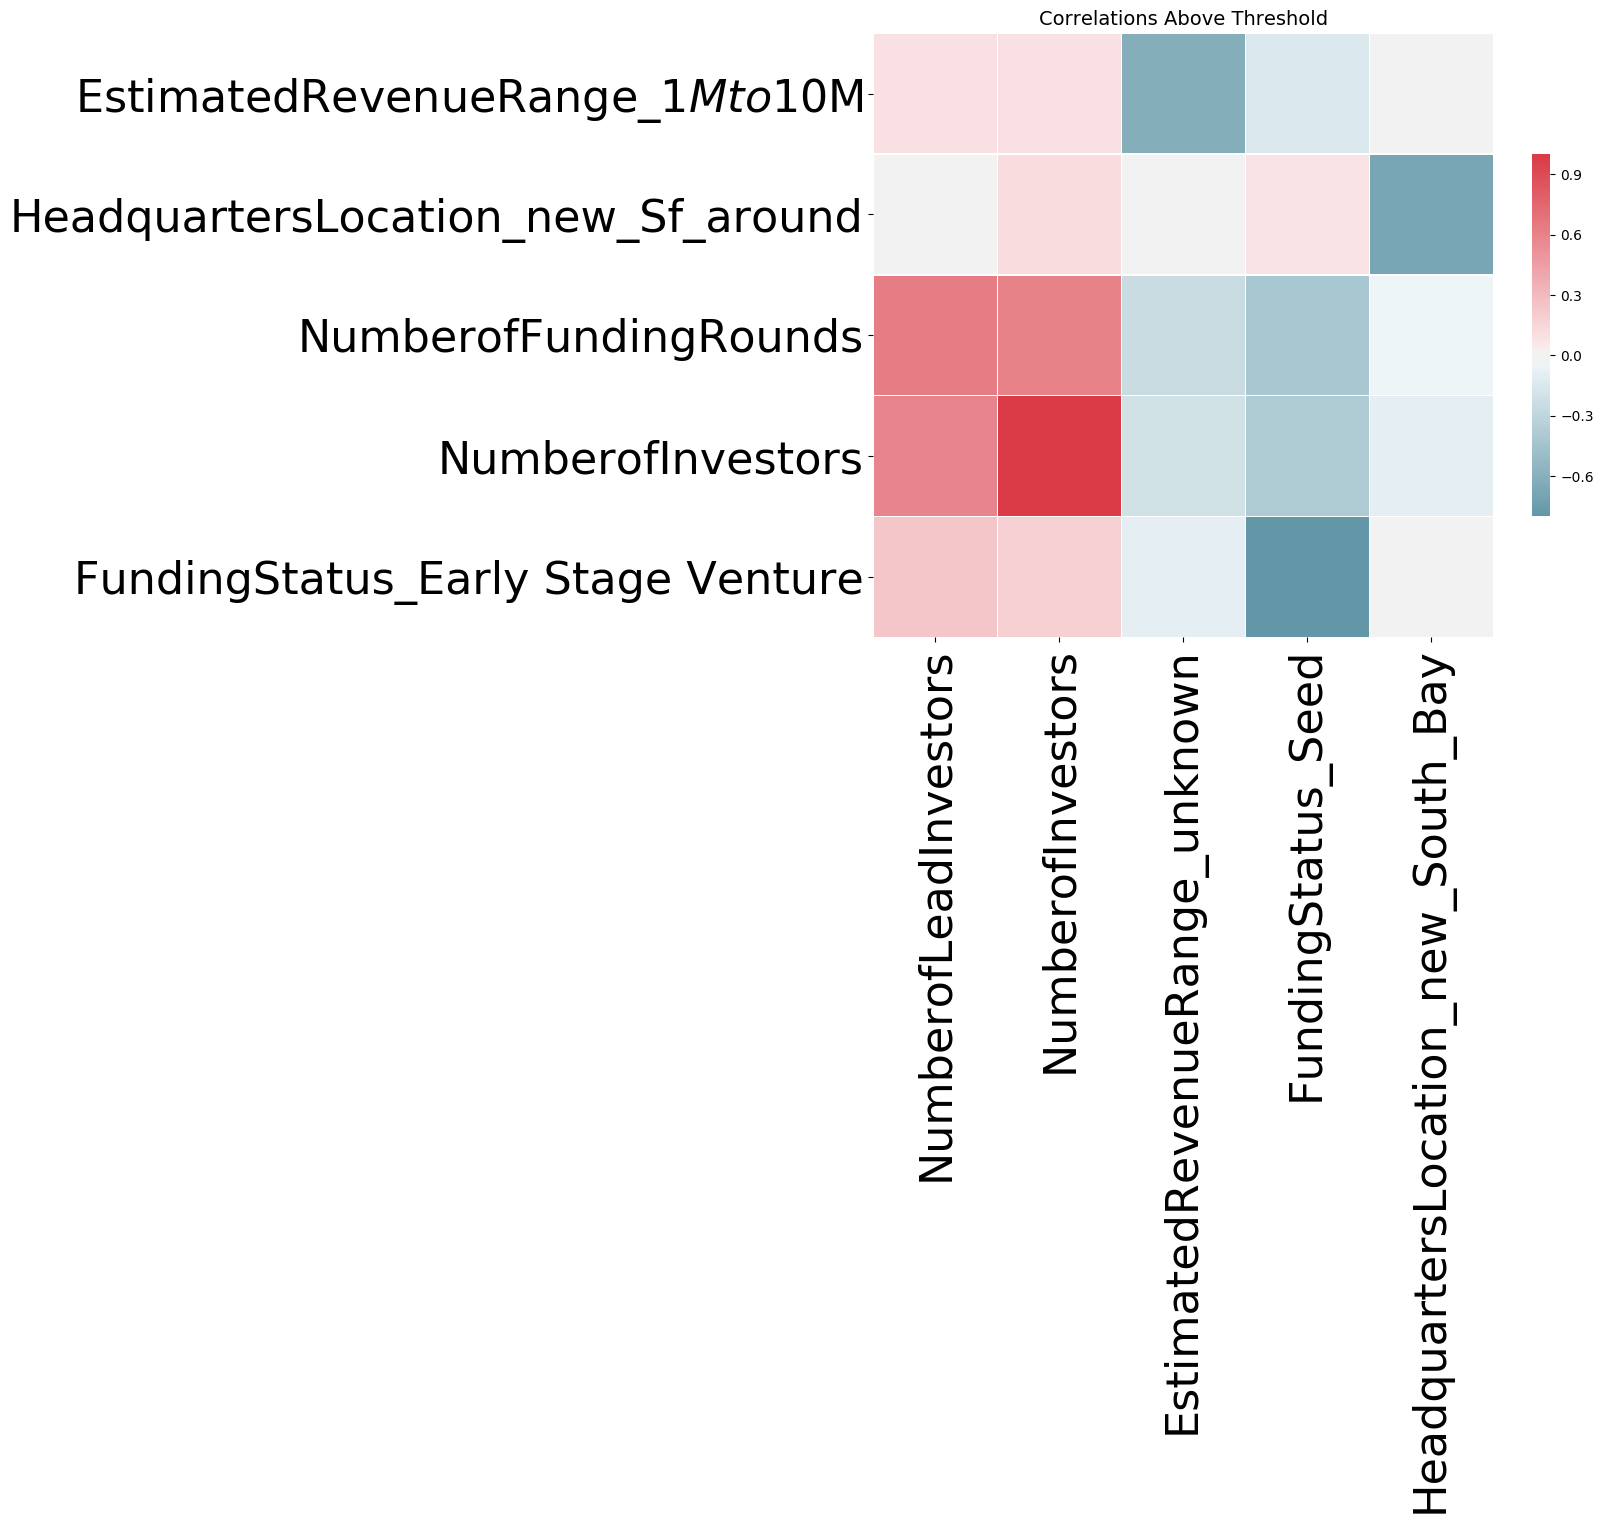

In [0]:
fs.plot_collinear()

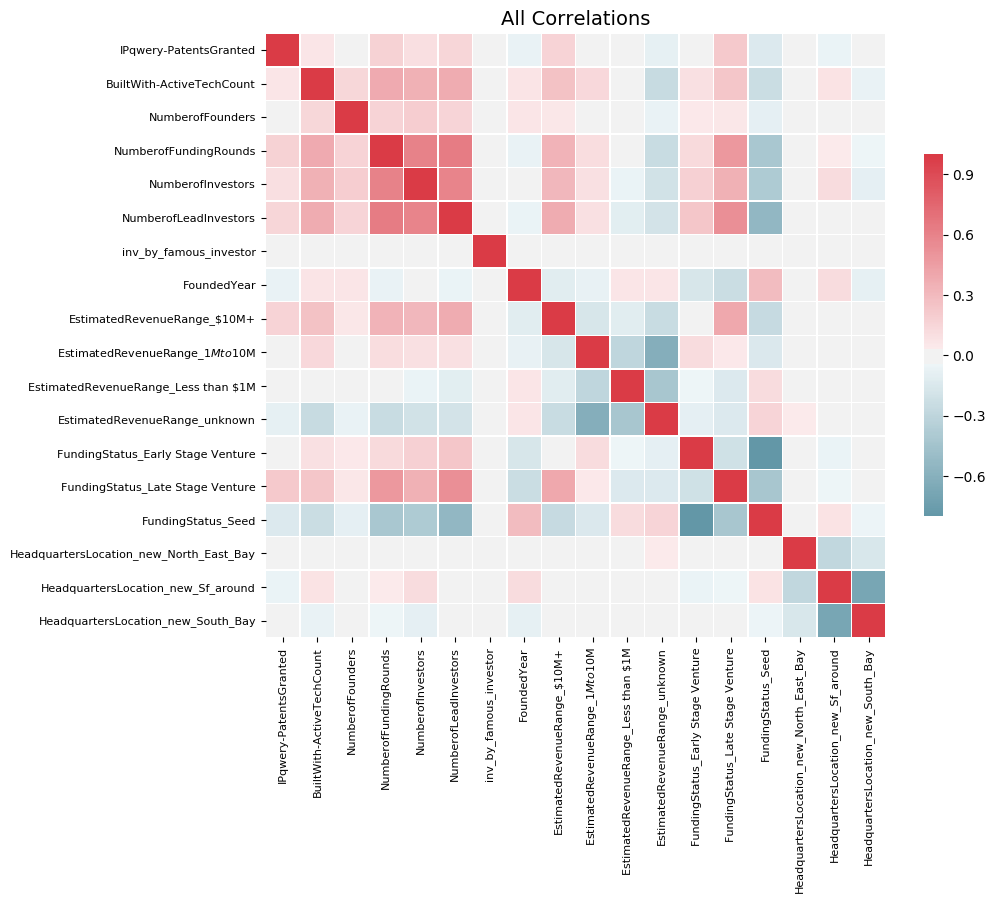

In [0]:
fs.plot_collinear(plot_all=True)


In [0]:
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[71]	valid_0's auc: 0.814376
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[70]	valid_0's auc: 0.788502
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[28]	valid_0's auc: 0.797009
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[50]	valid_0's auc: 0.796697
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[43]	valid_0's auc: 0.786042
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.804988
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[30]	valid_0's auc: 0.803849
Training until validation scores don't improve for 100 rounds.
Early stopping

In [0]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

There are 18 original features
There are 0 one-hot features


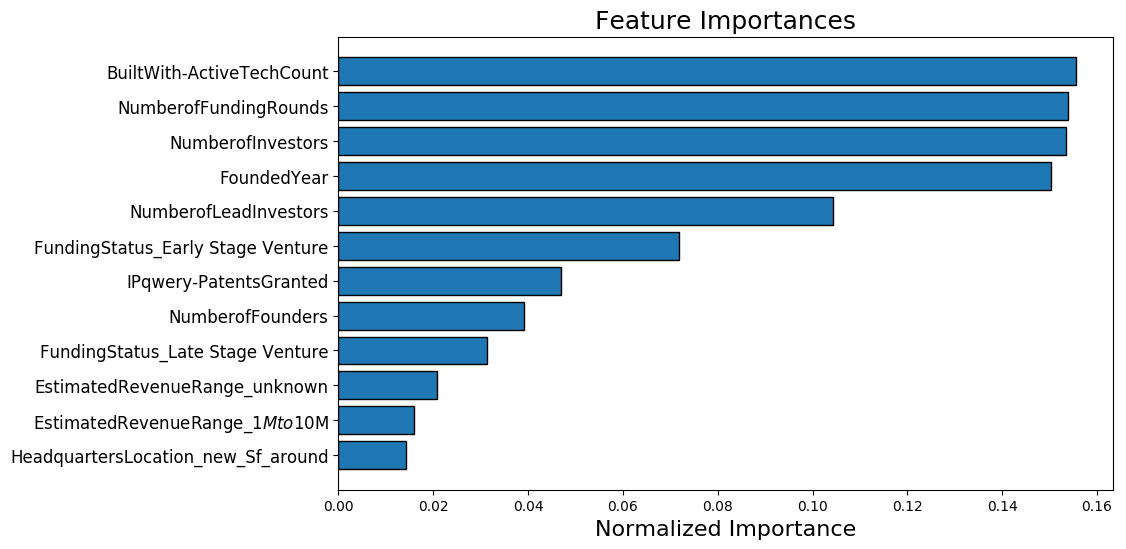

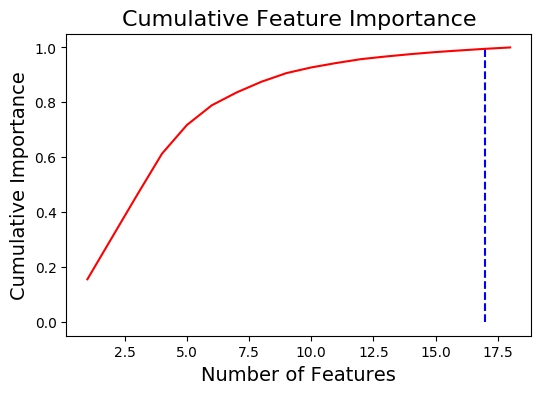

17 features required for 0.99 of cumulative importance


In [0]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [0]:
fs.feature_importances.head(10)


,feature,importance,normalized_importance,cumulative_importance
0,BuiltWith-ActiveTechCount,260.1,0.155655,0.155655
1,NumberofFundingRounds,257.0,0.153800,0.309455
2,NumberofInvestors,256.5,0.153501,0.462956
3,FoundedYear,251.0,0.150209,0.613166
4,NumberofLeadInvestors,174.2,0.104249,0.717415
5,FundingStatus_Early Stage Venture,119.9,0.071753,0.789168
6,IPqwery-PatentsGranted,78.4,0.046918,0.836086
7,NumberofFounders,65.3,0.039078,0.875165
8,FundingStatus_Late Stage Venture,52.3,0.031299,0.906463
9,EstimatedRevenueRange_unknown,34.6,0.020706,0.927169


# **Data Story- clustering**



In [0]:
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import  KFold, cross_val_score

# **Data Split**

In [0]:
# Split the data with 80% to train and 20% to test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=40,
                                                    stratify=y)

In [0]:
# Standardize the data
#scaler = StandardScaler()
# Fit the scaler using the training data and scale it
#X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.values),
                              #columns=X.columns)
# Scale the test data
#X_test_scaled = pd.DataFrame(scaler.transform(X_test.values),
                             #columns=X.columns)

In [0]:
#X_test_scaled.shape

In [0]:
y_test.shape

(1643,)

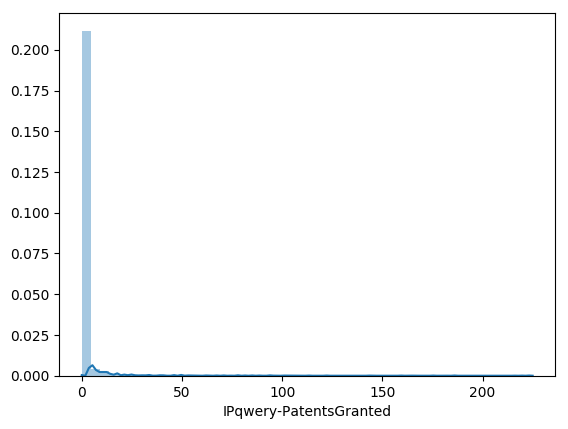

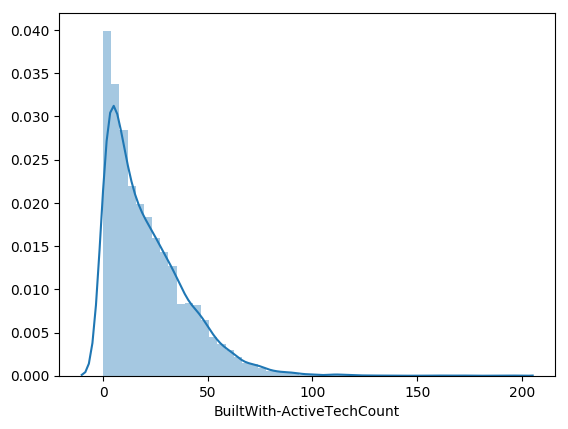

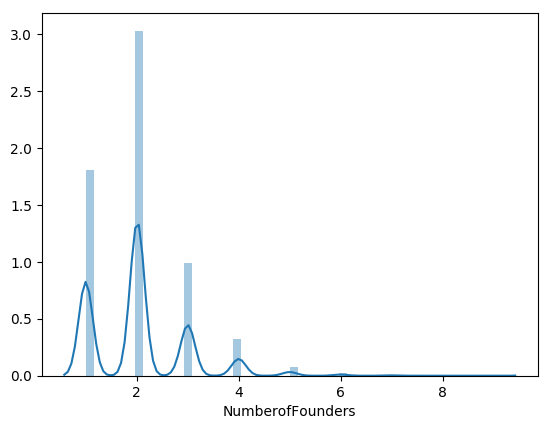

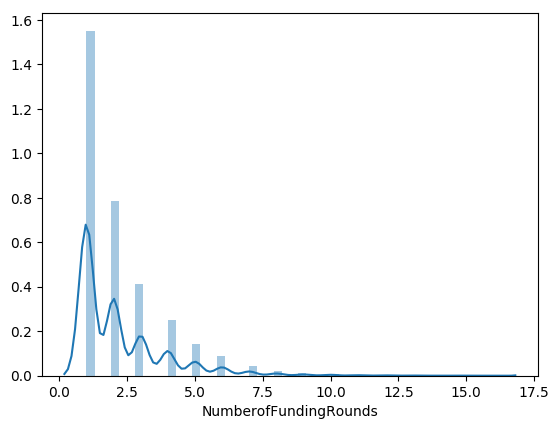

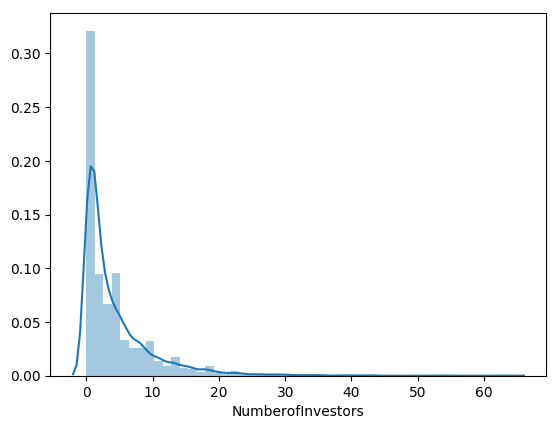

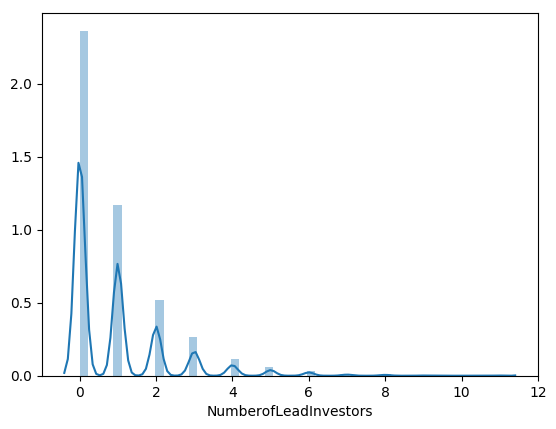

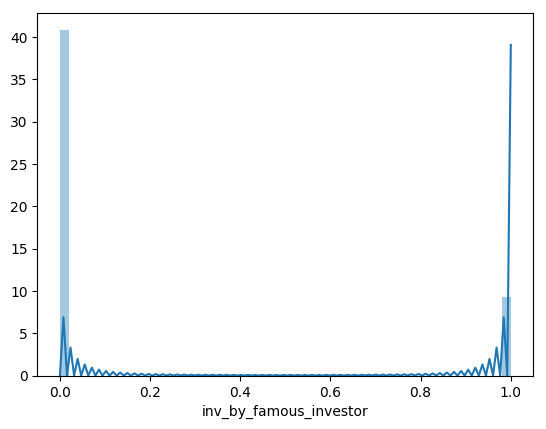

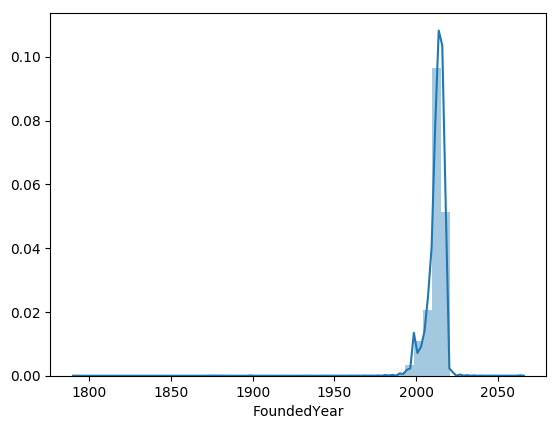

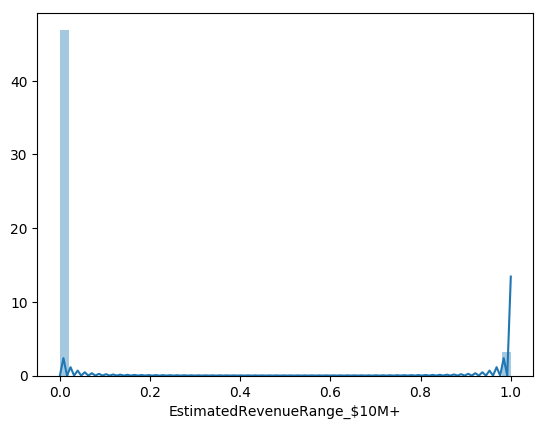

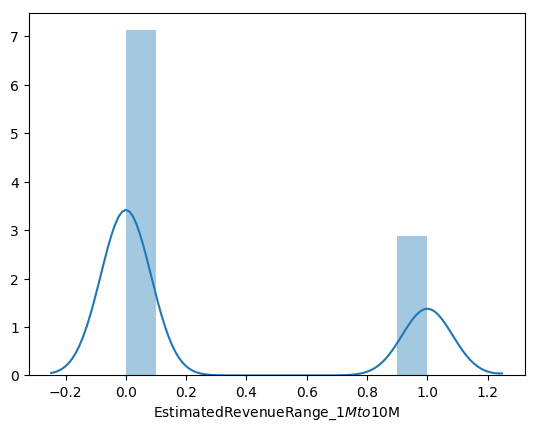

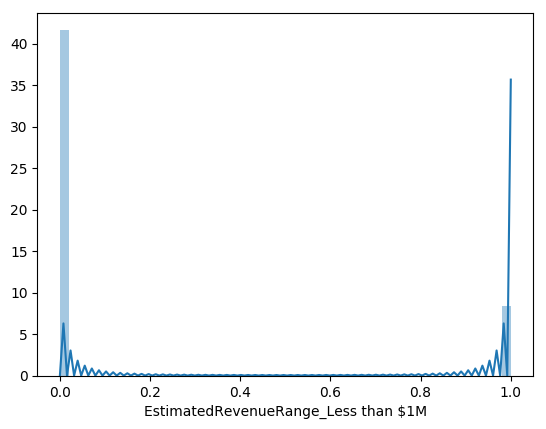

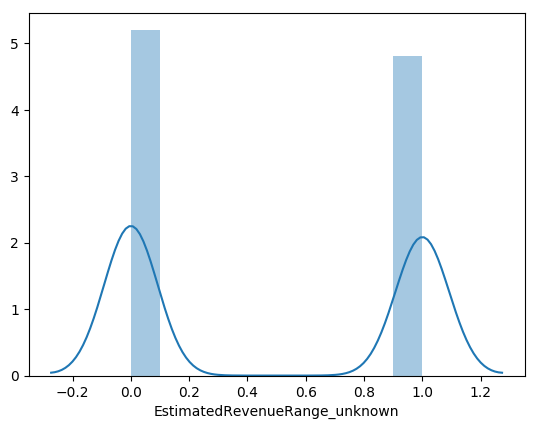

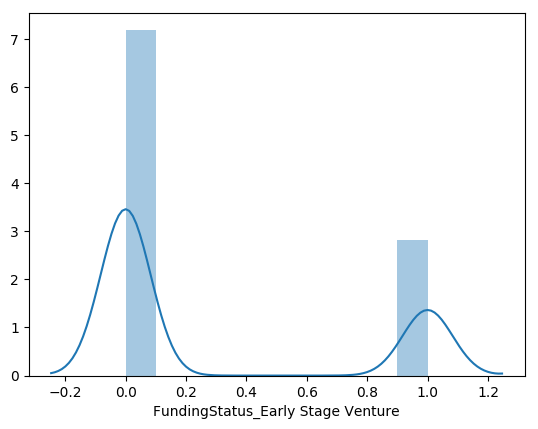

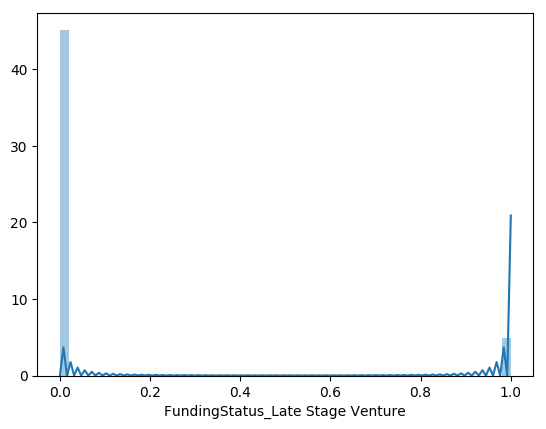

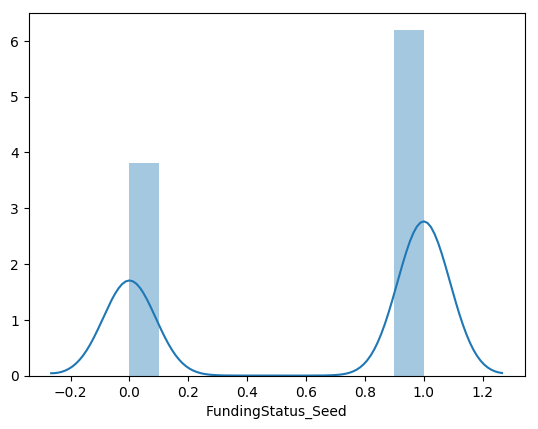

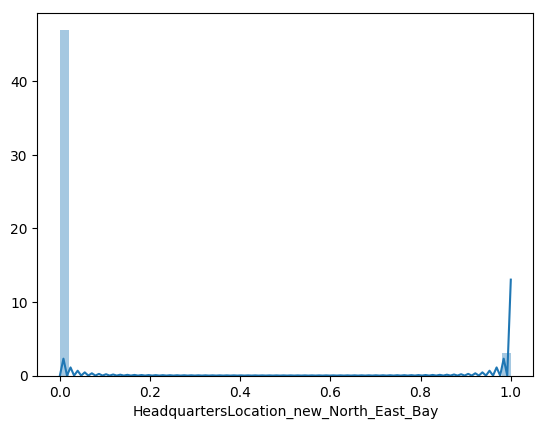

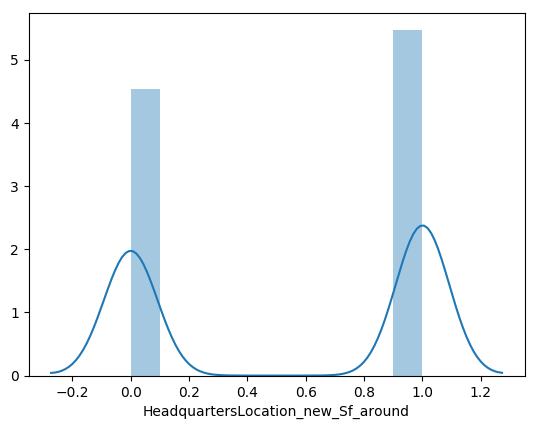

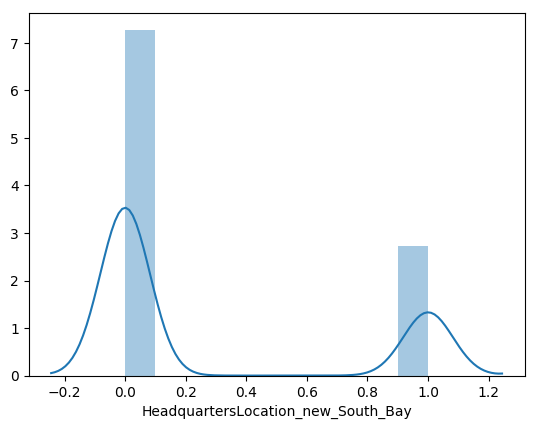

In [0]:
for col_name in X_train.columns:
  plt.figure()
  sns.distplot(X_train[col_name])
  plt.show()

# **K means**

**Determine Number of Clusters (Elbow Method)**


In [0]:
#X = np.log(X)

In [0]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 


In [0]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

In [0]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 17.852503757756203
2 : 12.211181795661643
3 : 10.209398454462077
4 : 9.937223686349625
5 : 9.083883998950647
6 : 8.488976662450193
7 : 8.398323607533984
8 : 7.807693359621123
9 : 7.708567946163838


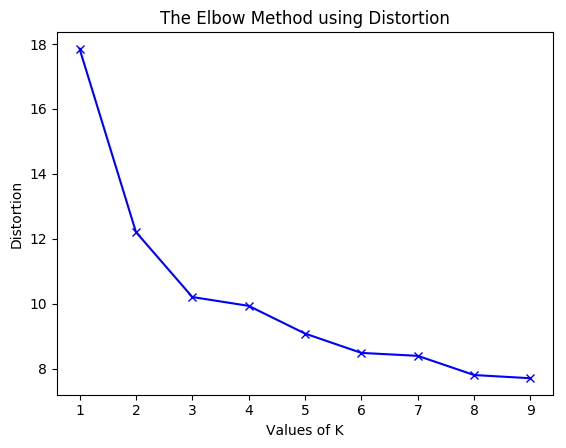

In [0]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

In [0]:

from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(X_train)
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

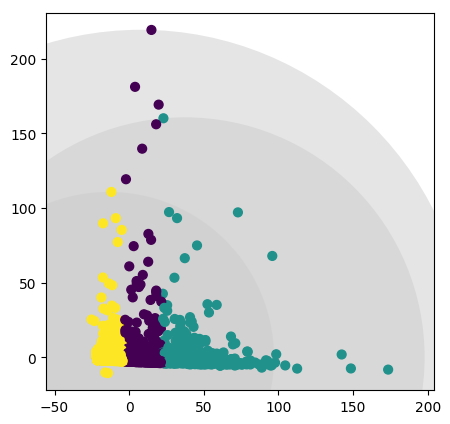

In [0]:
plt.figure(figsize = (5,5))
from scipy.spatial.distance import cdist
def plot_kmeans(kmeans, X, n_clusters=3, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
        
plot_kmeans(kmeans, Y_sklearn)

**K means for number of Employees**